Cohort Analysis

In [4]:
import pandas as pd
import numpy as np

events = pd.read_csv('events.csv')
creators = pd.read_csv('creators.csv')
links = pd.read_csv('links.csv')
sales = pd.read_csv('sales.csv')


In [5]:
events.head()

,event_id,creator_id,event_type,event_date
0,1,16,share_link,2024-04-26
1,2,182,signup,2024-01-09
2,3,499,create_link,2024-05-05
3,4,329,purchase,2024-03-17
4,5,129,purchase,2024-01-10


In [6]:
creators.head()

,creator_id,signup_date,country,platform
0,1,2024-01-01,UK,Blog
1,2,2024-01-02,Canada,Instagram
2,3,2024-01-03,India,Instagram
3,4,2024-01-04,UK,Twitter
4,5,2024-01-05,UK,Blog


In [8]:
links.head()

,link_id,creator_id,product_category,created_date
0,1,447,Fitness,2024-06-12
1,2,145,Home,2024-03-13
2,3,201,Fitness,2024-02-15
3,4,417,Home,2024-04-15
4,5,212,Beauty,2024-06-08


In [9]:
sales.head()

,sale_id,creator_id,revenue,sale_date
0,1,437,50.88,2024-01-23
1,2,72,145.84,2024-02-16
2,3,433,89.82,2024-03-15
3,4,177,132.23,2024-04-02
4,5,348,44.95,2024-05-06


In [17]:
events.sort_values('creator_id').head(15)

,event_id,creator_id,event_type,event_date
661,662,1,signup,2024-06-17
2884,2885,1,create_link,2024-03-18
4429,4430,1,share_link,2024-01-20
2325,2326,1,visit,2024-01-01
4500,4501,1,signup,2024-03-30
6898,6899,1,purchase,2024-02-20
406,407,1,purchase,2024-01-27
1744,1745,1,create_link,2024-01-22
7195,7196,1,purchase,2024-03-23
318,319,1,share_link,2024-02-11


In [18]:
creators['signup_date'] = pd.to_datetime(creators['signup_date'])
events['event_date']    = pd.to_datetime(events['event_date'])
links['created_date']   = pd.to_datetime(links['created_date'])
sales['sale_date']      = pd.to_datetime(sales['sale_date'])

In [35]:
firstsign=events[events['event_type']=='signup'].reset_index(drop=True)

In [36]:
firstsign=firstsign.groupby('creator_id')['event_date'].min().reset_index()

In [37]:
firstsign

,creator_id,event_date
0,1,2024-01-21
1,2,2024-01-08
2,3,2024-01-25
3,4,2024-02-16
4,5,2024-02-20
...,...,...
480,496,2024-01-14
481,497,2024-04-17
482,498,2024-02-05
483,499,2024-05-11


In [ ]:
firstsign=firstsign.merge(events[])

In [42]:
sales_event=sales[['creator_id','sale_date']]

In [50]:
sales_event.groupby('creator_id').head().sort_values('creator_id')

,creator_id,sale_date
1330,1,2024-05-24
1888,1,2024-01-15
349,1,2024-02-28
1717,1,2024-04-14
843,1,2024-05-10
...,...,...
2576,499,2024-02-11
2868,500,2024-06-28
145,500,2024-01-20
1026,500,2024-06-13


In [52]:
sales_event['event_type']='purchase'

C:\Users\Hardik\AppData\Local\Temp\ipykernel_12924\2621805444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_event['event_type']='purchase'


In [56]:
sales_event

,creator_id,event_date,event_type
0,437,2024-01-23,purchase
1,72,2024-02-16,purchase
2,433,2024-03-15,purchase
3,177,2024-04-02,purchase
4,348,2024-05-06,purchase
...,...,...,...
2995,189,2024-01-26,purchase
2996,277,2024-01-22,purchase
2997,225,2024-05-04,purchase
2998,103,2024-06-21,purchase


In [55]:
sales_event=sales_event.rename(columns={'sale_date':'event_date'})

In [58]:
activity = events[['creator_id','event_date','event_type']].copy()
activity = pd.concat([activity, sales_event], ignore_index=True)

In [66]:
activity[activity['creator_id']==1]

,creator_id,event_date,event_type
244,1,2024-03-02,share_link
318,1,2024-02-11,share_link
406,1,2024-01-27,purchase
661,1,2024-06-17,signup
1366,1,2024-01-21,signup
1744,1,2024-01-22,create_link
2325,1,2024-01-01,visit
2884,1,2024-03-18,create_link
4429,1,2024-01-20,share_link
4500,1,2024-03-30,signup


In [67]:
activity = activity.merge(firstsign, on='creator_id', how='left')

In [71]:
activity[activity['creator_id']==1]

,creator_id,event_date_x,event_type,true_signup
244,1,2024-03-02,share_link,2024-01-21
318,1,2024-02-11,share_link,2024-01-21
406,1,2024-01-27,purchase,2024-01-21
661,1,2024-06-17,signup,2024-01-21
1366,1,2024-01-21,signup,2024-01-21
1744,1,2024-01-22,create_link,2024-01-21
2325,1,2024-01-01,visit,2024-01-21
2884,1,2024-03-18,create_link,2024-01-21
4429,1,2024-01-20,share_link,2024-01-21
4500,1,2024-03-30,signup,2024-01-21


In [70]:
activity=activity.rename(columns={'event_date_y':'true_signup'})

In [72]:
activity=activity.rename(columns={'event_date_x':'event_date'})

In [73]:
activity.head()

,creator_id,event_date,event_type,true_signup
0,16,2024-04-26,share_link,2024-02-16
1,182,2024-01-09,signup,2024-01-09
2,499,2024-05-05,create_link,2024-05-11
3,329,2024-03-17,purchase,2024-01-07
4,129,2024-01-10,purchase,2024-01-01


In [101]:
activity['days_after_signup']=(activity['event_date']-activity['true_signup']).dt.days

In [104]:
activity

,creator_id,event_date,event_type,true_signup,days_after_signup
0,16,2024-04-26,share_link,2024-02-16,70.0
1,182,2024-01-09,signup,2024-01-09,0.0
2,499,2024-05-05,create_link,2024-05-11,-6.0
3,329,2024-03-17,purchase,2024-01-07,70.0
4,129,2024-01-10,purchase,2024-01-01,9.0
...,...,...,...,...,...
10995,189,2024-01-26,purchase,2024-03-11,-45.0
10996,277,2024-01-22,purchase,2024-05-09,-108.0
10997,225,2024-05-04,purchase,2024-04-27,7.0
10998,103,2024-06-21,purchase,2024-03-07,106.0


In [110]:
activity[(activity['days_after_signup']<=30) & (activity['days_after_signup']>0)].sort_values('creator_id')

,creator_id,event_date,event_type,true_signup,days_after_signup
406,1,2024-01-27,purchase,2024-01-21,6.0
6898,1,2024-02-20,purchase,2024-01-21,30.0
5691,1,2024-01-24,purchase,2024-01-21,3.0
6628,1,2024-01-30,signup,2024-01-21,9.0
1744,1,2024-01-22,create_link,2024-01-21,1.0
...,...,...,...,...,...
10530,498,2024-02-22,purchase,2024-02-05,17.0
3381,499,2024-06-10,purchase,2024-05-11,30.0
5851,500,2024-03-20,purchase,2024-02-20,29.0
10087,500,2024-02-29,purchase,2024-02-20,9.0


In [112]:
meaningful = ['create_link','share_link','purchase','visit']

valid_actions = activity[
    (activity['event_type'].isin(meaningful)) &
    (activity['days_after_signup'] >= 0) &
    (activity['days_after_signup'] <= 30)
]

retention_30 = (
    valid_actions
    .groupby('creator_id')
    .size()
    .reset_index(name='actions')
)

retention_30['retained_30d'] = 1


In [114]:
creators_retention = firstsign.merge(
    retention_30[['creator_id','retained_30d']],
    on='creator_id',
    how='left'
)

creators_retention['retained_30d'] = creators_retention['retained_30d'].fillna(0)


In [ ]:
creators_retention

,creator_id,event_date,retained_30d
0,1,2024-01-21,1.0
1,2,2024-01-08,1.0
2,3,2024-01-25,1.0
3,4,2024-02-16,0.0
4,5,2024-02-20,1.0
...,...,...,...
480,496,2024-01-14,1.0
481,497,2024-04-17,1.0
482,498,2024-02-05,1.0
483,499,2024-05-11,1.0


In [119]:
creators_retention=creators_retention.rename(columns={'event_date':'true_signup'})

In [120]:
creators_retention['cohort_month'] = (
    creators_retention['true_signup']
    .dt.to_period('M')
)

In [121]:
creators_retention

,creator_id,true_signup,retained_30d,cohort_month
0,1,2024-01-21,1.0,2024-01
1,2,2024-01-08,1.0,2024-01
2,3,2024-01-25,1.0,2024-01
3,4,2024-02-16,0.0,2024-02
4,5,2024-02-20,1.0,2024-02
...,...,...,...,...
480,496,2024-01-14,1.0,2024-01
481,497,2024-04-17,1.0,2024-04
482,498,2024-02-05,1.0,2024-02
483,499,2024-05-11,1.0,2024-05


In [122]:
cohort_summary = (
    creators_retention
    .groupby('cohort_month')
    .agg(
        total_creators = ('creator_id','nunique'),
        retained_30d   = ('retained_30d','sum')
    )
    .reset_index()
)

In [123]:
cohort_summary

,cohort_month,total_creators,retained_30d
0,2024-01,221,212.0
1,2024-02,129,126.0
2,2024-03,63,62.0
3,2024-04,34,33.0
4,2024-05,29,28.0
5,2024-06,9,6.0


In [124]:
cohort_summary['retention_rate'] = (
    cohort_summary['retained_30d'] /
    cohort_summary['total_creators']
)

In [125]:
cohort_summary

,cohort_month,total_creators,retained_30d,retention_rate
0,2024-01,221,212.0,0.959276
1,2024-02,129,126.0,0.976744
2,2024-03,63,62.0,0.984127
3,2024-04,34,33.0,0.970588
4,2024-05,29,28.0,0.965517
5,2024-06,9,6.0,0.666667


In [126]:
activity

,creator_id,event_date,event_type,true_signup,days_after_signup
0,16,2024-04-26,share_link,2024-02-16,70.0
1,182,2024-01-09,signup,2024-01-09,0.0
2,499,2024-05-05,create_link,2024-05-11,-6.0
3,329,2024-03-17,purchase,2024-01-07,70.0
4,129,2024-01-10,purchase,2024-01-01,9.0
...,...,...,...,...,...
10995,189,2024-01-26,purchase,2024-03-11,-45.0
10996,277,2024-01-22,purchase,2024-05-09,-108.0
10997,225,2024-05-04,purchase,2024-04-27,7.0
10998,103,2024-06-21,purchase,2024-03-07,106.0


In [ ]:
activity['Activation']=activity[activity['event_date']=='create_link'].min().f

In [128]:
activity[
    (activity['event_type']=='create_link') & 
    (activity['days_after_signup']>=0) &
    (activity['days_after_signup']<=7) 
    ].sort_values('creator_id')

,creator_id,event_date,event_type,true_signup,days_after_signup
1744,1,2024-01-22,create_link,2024-01-21,1.0
2750,12,2024-02-28,create_link,2024-02-22,6.0
1557,18,2024-02-07,create_link,2024-02-01,6.0
7830,25,2024-02-06,create_link,2024-01-31,6.0
7930,26,2024-01-22,create_link,2024-01-22,0.0
...,...,...,...,...,...
5803,470,2024-02-27,create_link,2024-02-25,2.0
6906,476,2024-05-19,create_link,2024-05-14,5.0
2294,482,2024-05-20,create_link,2024-05-16,4.0
2527,492,2024-01-18,create_link,2024-01-18,0.0


In [129]:
creators_retention

,creator_id,true_signup,retained_30d,cohort_month
0,1,2024-01-21,1.0,2024-01
1,2,2024-01-08,1.0,2024-01
2,3,2024-01-25,1.0,2024-01
3,4,2024-02-16,0.0,2024-02
4,5,2024-02-20,1.0,2024-02
...,...,...,...,...
480,496,2024-01-14,1.0,2024-01
481,497,2024-04-17,1.0,2024-04
482,498,2024-02-05,1.0,2024-02
483,499,2024-05-11,1.0,2024-05


In [130]:
activated_creators = activity[
    (activity['event_type'] == 'create_link') &
    (activity['days_after_signup'] >= 0) &
    (activity['days_after_signup'] <= 7)
]['creator_id'].unique()


In [131]:
activated_creators

array([274, 397, 214,  42,  58, 121, 266, 280,  18, 227, 191, 283,  47,
       159,   1,  75, 340, 170, 292, 482, 498, 492, 331,  39,  51,  12,
       293, 255,  38, 287, 466, 407, 262, 362, 104, 455, 327, 384, 402,
       186,  28, 114,  94, 428, 317, 192, 339,  31, 368, 313, 229, 470,
       276, 208, 345, 377, 445, 333, 349, 476, 319,  34,  69,  92, 464,
        25,  26])

In [132]:
import numpy as np

creators_retention['activation_status'] = np.where(
    creators_retention['creator_id'].isin(activated_creators),
    'Activated',
    'Not Activated'
)


In [133]:
activation_summary = (
    creators_retention
    .groupby('activation_status')
    .agg(
        total_creators = ('creator_id','nunique'),
        retained_30d   = ('retained_30d','sum')
    )
    .reset_index()
)


In [134]:
activation_summary['retention_rate'] = (
    activation_summary['retained_30d'] /
    activation_summary['total_creators']
)


In [135]:
activation_summary

,activation_status,total_creators,retained_30d,retention_rate
0,Activated,67,67.0,1.000000
1,Not Activated,418,400.0,0.956938


In [136]:
activity

,creator_id,event_date,event_type,true_signup,days_after_signup
0,16,2024-04-26,share_link,2024-02-16,70.0
1,182,2024-01-09,signup,2024-01-09,0.0
2,499,2024-05-05,create_link,2024-05-11,-6.0
3,329,2024-03-17,purchase,2024-01-07,70.0
4,129,2024-01-10,purchase,2024-01-01,9.0
...,...,...,...,...,...
10995,189,2024-01-26,purchase,2024-03-11,-45.0
10996,277,2024-01-22,purchase,2024-05-09,-108.0
10997,225,2024-05-04,purchase,2024-04-27,7.0
10998,103,2024-06-21,purchase,2024-03-07,106.0


In [146]:
activity['cohort_month'] = activity['true_signup'].dt.to_period('M')
activity['activity_month'] = activity['event_date'].dt.to_period('M')

activity['cohort_index'] = (
    activity['activity_month'].astype(int) -
    activity['cohort_month'].astype(int)
)



In [147]:
valid = activity[
    (activity['event_type'].isin(['create_link','share_link','purchase','visit'])) &
    (activity['cohort_index'] >= 0)
]



In [148]:
cohort_data = (
    valid
    .groupby(['cohort_month','cohort_index'])['creator_id']
    .nunique()          # UNIQUE CREATOR COUNT ONLY
    .reset_index()
)


In [149]:
cohort_matrix = cohort_data.pivot(
    index='cohort_month',
    columns='cohort_index',
    values='creator_id'
)



In [150]:
cohort_matrix

cohort_index,0,1,2,3,4,5
cohort_month,,,,,,
2024-01,211.0,206.0,212.0,209.0,212.0,213.0
2024-02,124.0,123.0,126.0,122.0,122.0,NaN
2024-03,62.0,63.0,59.0,59.0,NaN,NaN
2024-04,31.0,32.0,32.0,NaN,NaN,NaN
2024-05,26.0,28.0,NaN,NaN,NaN,NaN
2024-06,9.0,NaN,NaN,NaN,NaN,NaN


In [152]:
cohort_size = cohort_matrix[0]

retention_matrix = cohort_matrix.divide(cohort_size, axis=0)

retention_matrix


cohort_index,0,1,2,3,4,5
cohort_month,,,,,,
2024-01,1.0,0.976303,1.004739,0.990521,1.004739,1.009479
2024-02,1.0,0.991935,1.016129,0.983871,0.983871,NaN
2024-03,1.0,1.016129,0.951613,0.951613,NaN,NaN
2024-04,1.0,1.032258,1.032258,NaN,NaN,NaN
2024-05,1.0,1.076923,NaN,NaN,NaN,NaN
2024-06,1.0,NaN,NaN,NaN,NaN,NaN


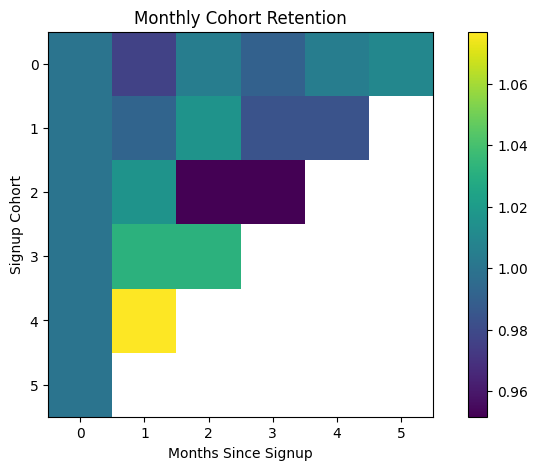

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
plt.imshow(retention_matrix)
plt.title("Monthly Cohort Retention")
plt.ylabel("Signup Cohort")
plt.xlabel("Months Since Signup")
plt.colorbar()
plt.show()
